In [2]:
%load_ext autoreload
%autoreload 2
import sys
sys.path.append('../')

from models import bMFThreshold, bMFPenalty
import pandas as pd

### Generate Boolean matrix

[I] m            : 1000
[I] n            : 500
[I] k            : 5
[I] overlap_flag : False
[I] size_range   : [0.25 0.75 0.25 1.  ]
[I] seed         : 1234
[I] noise        : [0.4  0.02]
[I] seed         : 1024
[I] Using RandomState.


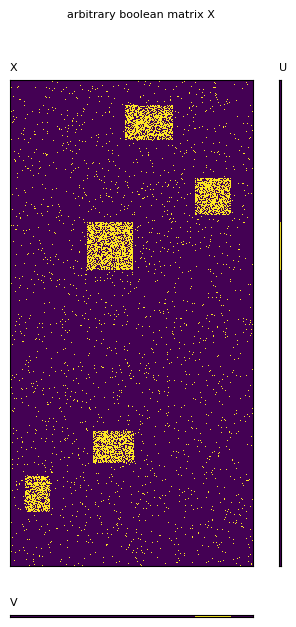

In [3]:
# generate arbitrary Boolean matrix (X)

from generators import DiagBooleanMatrix, ArbiBooleanMatrix

n_row=1000
n_col=500
k=5
overlap_flag=True
noise=[0.4, 0.02]
size_range=[0.25, 0.75, 0.25, 1.0]

X = ArbiBooleanMatrix(m=n_row, n=n_col, k=k, overlap_flag=False, size_range=size_range)
X.generate(seed=1234) # if no seed assigned, use time instead
X.add_noise(noise=noise, seed=1024)
X.show_matrix(scaling=0.2, title='arbitrary boolean matrix X')

## I. Reconstruction task

In [4]:
from datasets import NoSplit

X_split = NoSplit(X=X.X)

X_train, X_val, X_test = X_split.X_train, X_split.X_val, X_split.X_test

### 1. Manually select tau
k and w are not effective here.

[I] k            : 5
[I] algorithm    : penalty
[I] reg          : 10
[I] reg_growth   : 3
[I] eps          : 0.01
[I] max_iter     : 100
[I] display      : True
[I]   scaling    : 0.5
[W] Missing validation data.
[I] k            : 5
[I] seed         : 1702413577
[I] init         : random
[I] max_iter     : 2000
[W] Missing validation data.
[I] After initialization: max U: 1.704, max V: 1.010


c:\Users\nieht\Anaconda3\envs\cornac\lib\site-packages\scipy\sparse\_compressed.py:291: SparseEfficiencyWarning: Comparing a sparse matrix with a scalar greater than zero using < is inefficient, try using >= instead.
  warn(bad_scalar_msg, SparseEfficiencyWarning)
c:\Users\nieht\Anaconda3\envs\cornac\lib\site-packages\scipy\sparse\_index.py:146: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_arrayXarray(i, j, x)


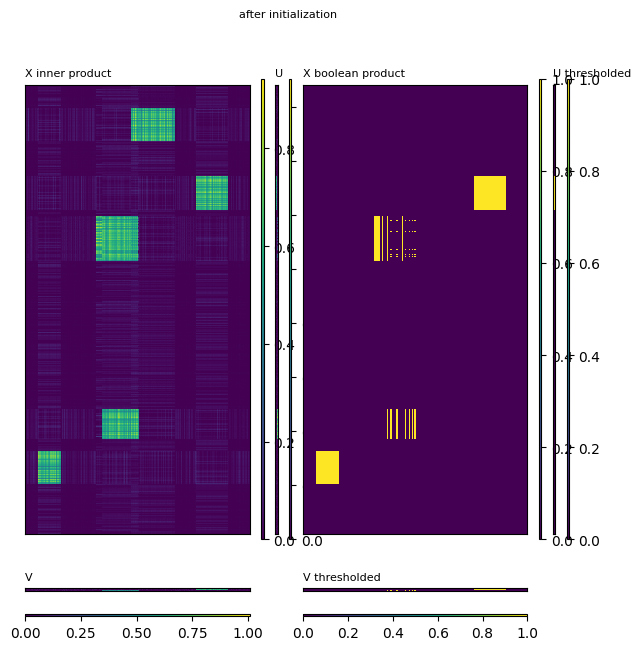

[I] After normalization: max U: 0.971, max V: 0.971


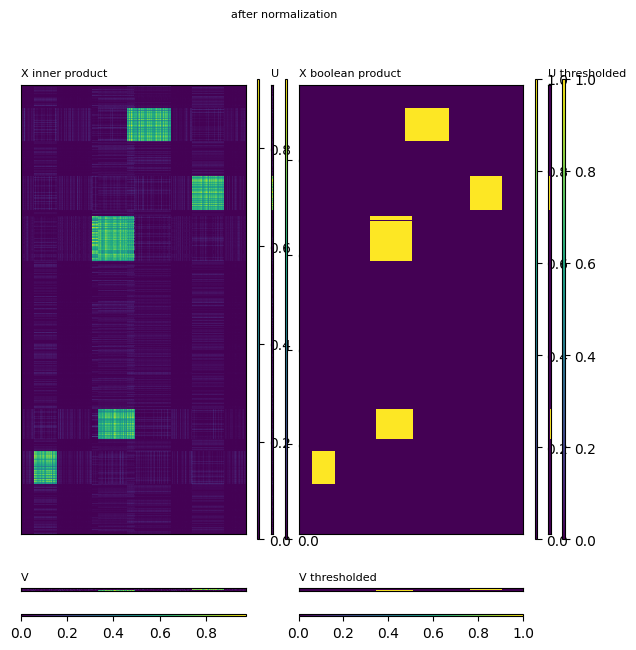

[I] iter: 0, reg: 1.0e+01, err: 33.538, rec_err: 16275.787, reg_err: 33.538
[I] iter: 1, reg: 3.0e+01, err: 31.294, rec_err: 16284.042, reg_err: 31.294
[I] iter: 2, reg: 9.0e+01, err: 28.129, rec_err: 16325.727, reg_err: 28.129
[I] iter: 3, reg: 2.7e+02, err: 23.663, rec_err: 16460.092, reg_err: 23.663
[I] iter: 4, reg: 8.1e+02, err: 18.791, rec_err: 16729.935, reg_err: 18.791
[I] iter: 5, reg: 2.4e+03, err: 14.166, rec_err: 17124.147, reg_err: 14.166
[I] iter: 6, reg: 7.3e+03, err: 10.201, rec_err: 17620.930, reg_err: 10.201
[I] iter: 7, reg: 2.2e+04, err: 7.110, rec_err: 18190.633, reg_err: 7.110
[I] iter: 8, reg: 6.6e+04, err: 4.840, rec_err: 18784.714, reg_err: 4.840
[I] iter: 9, reg: 2.0e+05, err: 3.238, rec_err: 19352.436, reg_err: 3.238


c:\Users\nieht\Anaconda3\envs\cornac\lib\site-packages\scipy\sparse\_index.py:146: SparseEfficiencyWarning: Changing the sparsity structure of a csc_matrix is expensive. lil_matrix is more efficient.
  self._set_arrayXarray(i, j, x)


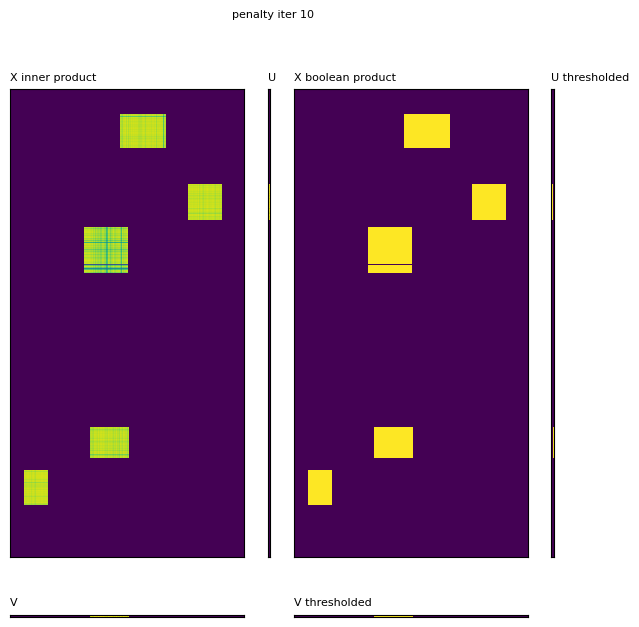

[I] iter: 10, reg: 5.9e+05, err: 2.131, rec_err: 19858.615, reg_err: 2.131
[I] iter: 11, reg: 1.8e+06, err: 1.372, rec_err: 20287.793, reg_err: 1.372
[I] iter: 12, reg: 5.3e+06, err: 0.851, rec_err: 20638.270, reg_err: 0.851
[I] iter: 13, reg: 1.6e+07, err: 0.511, rec_err: 20918.101, reg_err: 0.511
[I] iter: 14, reg: 4.8e+07, err: 0.315, rec_err: 21130.936, reg_err: 0.315
[I] iter: 15, reg: 1.4e+08, err: 0.204, rec_err: 21281.142, reg_err: 0.204
[I] iter: 16, reg: 4.3e+08, err: 0.135, rec_err: 21386.006, reg_err: 0.135
[I] iter: 17, reg: 1.3e+09, err: 0.089, rec_err: 21461.028, reg_err: 0.089
[I] iter: 18, reg: 3.9e+09, err: 0.057, rec_err: 21514.823, reg_err: 0.057
[I] iter: 19, reg: 1.2e+10, err: 0.035, rec_err: 21553.258, reg_err: 0.035


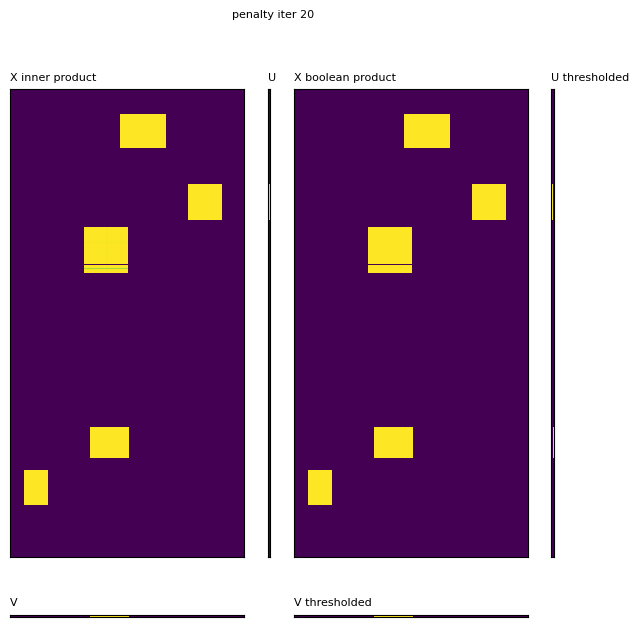

[I] iter: 20, reg: 3.5e+10, err: 0.021, rec_err: 21580.605, reg_err: 0.021
[I] iter: 21, reg: 1.0e+11, err: 0.012, rec_err: 21599.943, reg_err: 0.012
[I] iter: 22, reg: 3.1e+11, err: 0.006, rec_err: 21613.507, reg_err: 0.006
[W] Stopped in advance: Error lower than threshold


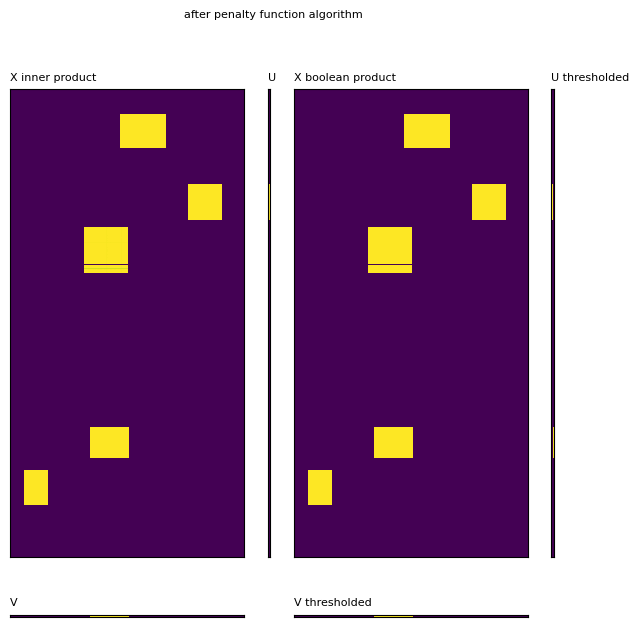

In [5]:
k = 5

bmf = bMFPenalty(k=k, reg_growth=3)
bmf.fit(X_train, display=True, scaling=0.5)

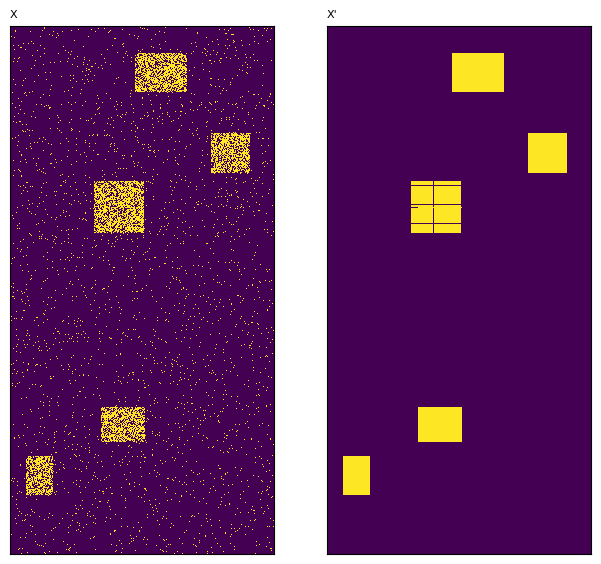

In [6]:
from utils import matmul, to_dense, show_matrix
settings = [(to_dense(X_test), [0, 0], 'X'), 
            (matmul(bmf.U, bmf.V.T, sparse=False, boolean=True), [0, 1], "X'")]
show_matrix(settings=settings, scaling=0.5)

[I] k            : 5
[I] algorithm    : threshold
[I] initial u, v : [0.8, 0.8]
[I] lamda        : 5
[I] eps          : 1e-06
[I] max_iter     : 100
[I] display      : True
[I]   scaling    : 0.5
[W] Missing validation data.
[I] k            : 5
[I] seed         : 1702412850
[I] init         : random
[I] max_iter     : 2000
[W] Missing validation data.
[I] After initialization: max U: 1.876, max V: 1.170


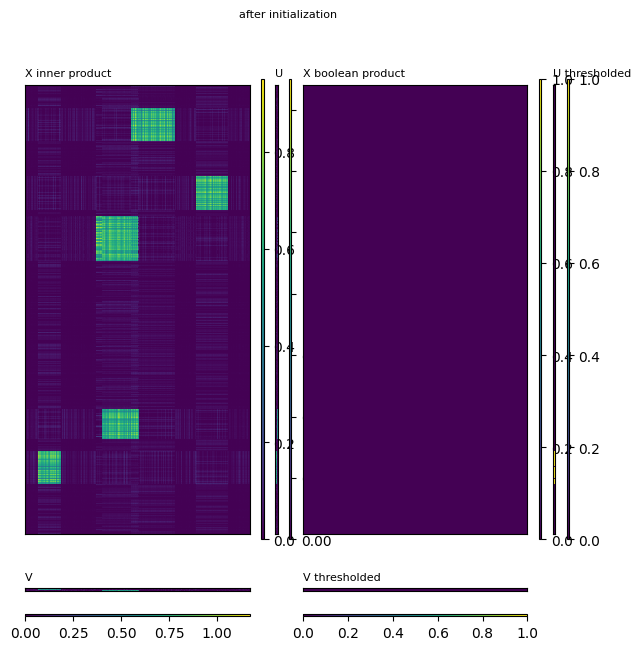

[I] After normalization: max U: 0.975, max V: 0.975


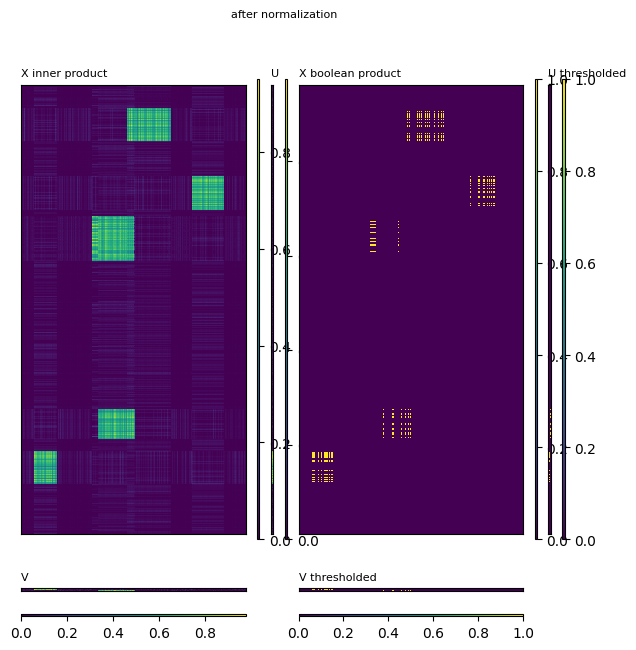

d:\Dropbox\PyBMF\examples\..\utils\common.py:68: RuntimeWarning: overflow encountered in exp
c:\Users\nieht\Anaconda3\envs\cornac\lib\site-packages\scipy\optimize\_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)


[W] Search direction is not a descent direction.


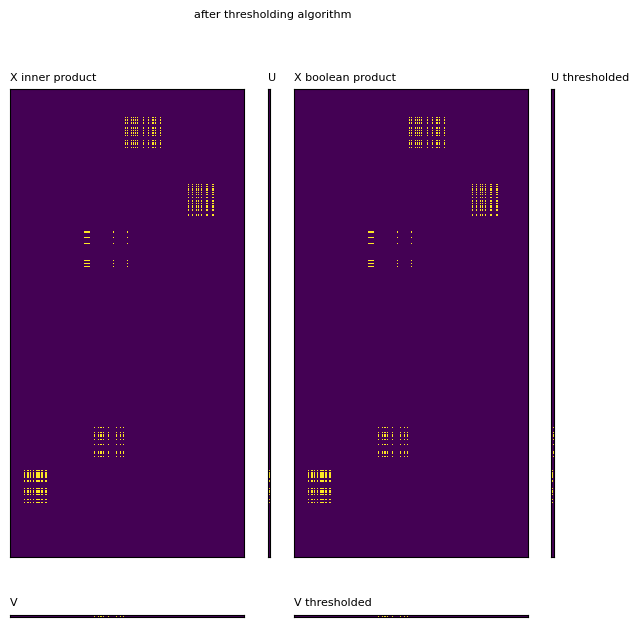

In [71]:
# eps=1e-06
lamda=5
max_iter=100

bmf = bMFThreshold(k=k, eps=None, lamda=lamda, max_iter=max_iter)
bmf.fit(X_train, display=True, scaling=0.5)

### 2. Grid search for w
Use some small k and selected tau for trials.

In [28]:
k = 5
tau = 0.30
w_list = [[0.4, 0.6], [0.5, 0.5], [0.6, 0.4], [0.7, 0.3], [0.8, 0.2], [0.9, 0.1]]

# empty table
from utils import add_log

# metrics from sklearn is included for checking
metrics = ['Recall', 'Precision', 'Error', 'Accuracy', 'F1', 'recall_score', 'precision_score', 'accuracy_score', 'f1_score']
columns = ['time', 'k', 'tau', 'p_pos', 'p_neg'] + metrics
df_prediction = pd.DataFrame(columns=columns)
df_reconstruction = pd.DataFrame(columns=columns)

[I] k            : 5
[I] tau          : 0.3
[I] weights      : [0.4, 0.6]
[W] Missing validation data.
[I] display      : True
[I]   scaling    : 0.3


100%|██████████| 5/5 [00:23<00:00,  4.68s/it]                         


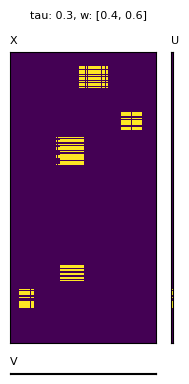

[I] task         : reconstruction


,time,k,tau,p_pos,p_neg,Recall,Precsion,Error,Accuracy,F1,recall_score,precision_score,accuracy_score,f1_score
0,2023-12-08 04:11:01.777041,5,0.3,0.4,0.6,0.414874,0.64855,0.045566,0.954434,0.506038,0.414874,0.64855,0.954434,0.506038


[I] task         : prediction


,time,k,tau,p_pos,p_neg,Recall,Precsion,Error,Accuracy,F1,recall_score,precision_score,accuracy_score,f1_score
0,2023-12-08 04:11:12.293833,5,0.3,0.4,0.6,0.414874,1.0,0.585126,0.414874,0.586447,0.414874,1.0,0.414874,0.586447


[I] k            : 5
[I] tau          : 0.3
[I] weights      : [0.5, 0.5]
[W] Missing validation data.
[I] display      : True
[I]   scaling    : 0.3


100%|██████████| 5/5 [00:24<00:00,  4.87s/it]                         


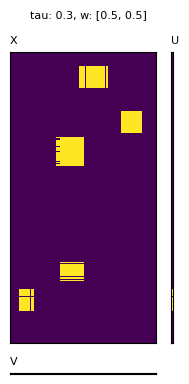

[I] task         : reconstruction


,time,k,tau,p_pos,p_neg,Recall,Precsion,Error,Accuracy,F1,recall_score,precision_score,accuracy_score,f1_score
0,2023-12-08 04:11:01.777041,5,0.3,0.4,0.6,0.414874,0.648550,0.045566,0.954434,0.506038,0.414874,0.648550,0.954434,0.506038
1,2023-12-08 04:11:37.706239,5,0.3,0.5,0.5,0.640442,0.612068,0.043064,0.956936,0.625934,0.640442,0.612068,0.956936,0.625934


[I] task         : prediction


,time,k,tau,p_pos,p_neg,Recall,Precsion,Error,Accuracy,F1,recall_score,precision_score,accuracy_score,f1_score
0,2023-12-08 04:11:12.293833,5,0.3,0.4,0.6,0.414874,1.0,0.585126,0.414874,0.586447,0.414874,1.0,0.414874,0.586447
1,2023-12-08 04:11:48.214716,5,0.3,0.5,0.5,0.640442,1.0,0.359558,0.640442,0.780817,0.640442,1.0,0.640442,0.780817


[I] k            : 5
[I] tau          : 0.3
[I] weights      : [0.6, 0.4]
[W] Missing validation data.
[I] display      : True
[I]   scaling    : 0.3


100%|██████████| 5/5 [00:24<00:00,  4.92s/it]                         


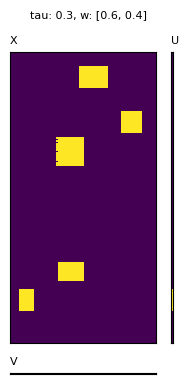

[I] task         : reconstruction


,time,k,tau,p_pos,p_neg,Recall,Precsion,Error,Accuracy,F1,recall_score,precision_score,accuracy_score,f1_score
0,2023-12-08 04:11:01.777041,5,0.3,0.4,0.6,0.414874,0.648550,0.045566,0.954434,0.506038,0.414874,0.648550,0.954434,0.506038
1,2023-12-08 04:11:37.706239,5,0.3,0.5,0.5,0.640442,0.612068,0.043064,0.956936,0.625934,0.640442,0.612068,0.956936,0.625934
2,2023-12-08 04:12:13.874046,5,0.3,0.6,0.4,0.664830,0.599545,0.043838,0.956162,0.630502,0.664830,0.599545,0.956162,0.630502


[I] task         : prediction


,time,k,tau,p_pos,p_neg,Recall,Precsion,Error,Accuracy,F1,recall_score,precision_score,accuracy_score,f1_score
0,2023-12-08 04:11:12.293833,5,0.3,0.4,0.6,0.414874,1.0,0.585126,0.414874,0.586447,0.414874,1.0,0.414874,0.586447
1,2023-12-08 04:11:48.214716,5,0.3,0.5,0.5,0.640442,1.0,0.359558,0.640442,0.780817,0.640442,1.0,0.640442,0.780817
2,2023-12-08 04:12:24.938715,5,0.3,0.6,0.4,0.664830,1.0,0.335170,0.664830,0.798676,0.664830,1.0,0.664830,0.798676


[I] k            : 5
[I] tau          : 0.3
[I] weights      : [0.7, 0.3]
[W] Missing validation data.
[I] display      : True
[I]   scaling    : 0.3


100%|██████████| 5/5 [00:26<00:00,  5.32s/it]                         


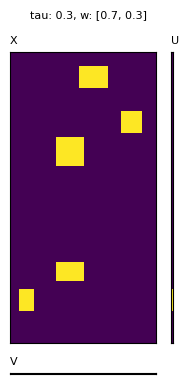

[I] task         : reconstruction


,time,k,tau,p_pos,p_neg,Recall,Precsion,Error,Accuracy,F1,recall_score,precision_score,accuracy_score,f1_score
0,2023-12-08 04:11:01.777041,5,0.3,0.4,0.6,0.414874,0.648550,0.045566,0.954434,0.506038,0.414874,0.648550,0.954434,0.506038
1,2023-12-08 04:11:37.706239,5,0.3,0.5,0.5,0.640442,0.612068,0.043064,0.956936,0.625934,0.640442,0.612068,0.956936,0.625934
2,2023-12-08 04:12:13.874046,5,0.3,0.6,0.4,0.664830,0.599545,0.043838,0.956162,0.630502,0.664830,0.599545,0.956162,0.630502
3,2023-12-08 04:12:52.626627,5,0.3,0.7,0.3,0.669274,0.589491,0.044826,0.955174,0.626854,0.669274,0.589491,0.955174,0.626854


[I] task         : prediction


,time,k,tau,p_pos,p_neg,Recall,Precsion,Error,Accuracy,F1,recall_score,precision_score,accuracy_score,f1_score
0,2023-12-08 04:11:12.293833,5,0.3,0.4,0.6,0.414874,1.0,0.585126,0.414874,0.586447,0.414874,1.0,0.414874,0.586447
1,2023-12-08 04:11:48.214716,5,0.3,0.5,0.5,0.640442,1.0,0.359558,0.640442,0.780817,0.640442,1.0,0.640442,0.780817
2,2023-12-08 04:12:24.938715,5,0.3,0.6,0.4,0.664830,1.0,0.335170,0.664830,0.798676,0.664830,1.0,0.664830,0.798676
3,2023-12-08 04:13:03.202594,5,0.3,0.7,0.3,0.669274,1.0,0.330726,0.669274,0.801874,0.669274,1.0,0.669274,0.801874


[I] k            : 5
[I] tau          : 0.3
[I] weights      : [0.8, 0.2]
[W] Missing validation data.
[I] display      : True
[I]   scaling    : 0.3


100%|██████████| 5/5 [00:24<00:00,  4.93s/it]                         


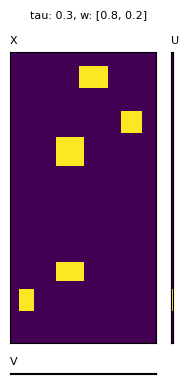

[I] task         : reconstruction


,time,k,tau,p_pos,p_neg,Recall,Precsion,Error,Accuracy,F1,recall_score,precision_score,accuracy_score,f1_score
0,2023-12-08 04:11:01.777041,5,0.3,0.4,0.6,0.414874,0.648550,0.045566,0.954434,0.506038,0.414874,0.648550,0.954434,0.506038
1,2023-12-08 04:11:37.706239,5,0.3,0.5,0.5,0.640442,0.612068,0.043064,0.956936,0.625934,0.640442,0.612068,0.956936,0.625934
2,2023-12-08 04:12:13.874046,5,0.3,0.6,0.4,0.664830,0.599545,0.043838,0.956162,0.630502,0.664830,0.599545,0.956162,0.630502
3,2023-12-08 04:12:52.626627,5,0.3,0.7,0.3,0.669274,0.589491,0.044826,0.955174,0.626854,0.669274,0.589491,0.955174,0.626854
4,2023-12-08 04:13:29.037089,5,0.3,0.8,0.2,0.669274,0.589491,0.044826,0.955174,0.626854,0.669274,0.589491,0.955174,0.626854


[I] task         : prediction


,time,k,tau,p_pos,p_neg,Recall,Precsion,Error,Accuracy,F1,recall_score,precision_score,accuracy_score,f1_score
0,2023-12-08 04:11:12.293833,5,0.3,0.4,0.6,0.414874,1.0,0.585126,0.414874,0.586447,0.414874,1.0,0.414874,0.586447
1,2023-12-08 04:11:48.214716,5,0.3,0.5,0.5,0.640442,1.0,0.359558,0.640442,0.780817,0.640442,1.0,0.640442,0.780817
2,2023-12-08 04:12:24.938715,5,0.3,0.6,0.4,0.664830,1.0,0.335170,0.664830,0.798676,0.664830,1.0,0.664830,0.798676
3,2023-12-08 04:13:03.202594,5,0.3,0.7,0.3,0.669274,1.0,0.330726,0.669274,0.801874,0.669274,1.0,0.669274,0.801874
4,2023-12-08 04:13:39.415041,5,0.3,0.8,0.2,0.669274,1.0,0.330726,0.669274,0.801874,0.669274,1.0,0.669274,0.801874


[I] k            : 5
[I] tau          : 0.3
[I] weights      : [0.9, 0.1]
[W] Missing validation data.
[I] display      : True
[I]   scaling    : 0.3


100%|██████████| 5/5 [00:25<00:00,  5.01s/it]                         


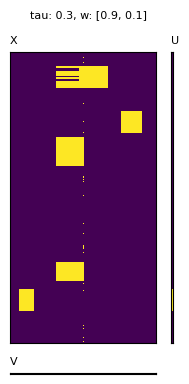

[I] task         : reconstruction


,time,k,tau,p_pos,p_neg,Recall,Precsion,Error,Accuracy,F1,recall_score,precision_score,accuracy_score,f1_score
1,2023-12-08 04:11:37.706239,5,0.3,0.5,0.5,0.640442,0.612068,0.043064,0.956936,0.625934,0.640442,0.612068,0.956936,0.625934
2,2023-12-08 04:12:13.874046,5,0.3,0.6,0.4,0.664830,0.599545,0.043838,0.956162,0.630502,0.664830,0.599545,0.956162,0.630502
3,2023-12-08 04:12:52.626627,5,0.3,0.7,0.3,0.669274,0.589491,0.044826,0.955174,0.626854,0.669274,0.589491,0.955174,0.626854
4,2023-12-08 04:13:29.037089,5,0.3,0.8,0.2,0.669274,0.589491,0.044826,0.955174,0.626854,0.669274,0.589491,0.955174,0.626854
5,2023-12-08 04:14:05.526193,5,0.3,0.9,0.1,0.674286,0.519886,0.053356,0.946644,0.587105,0.674286,0.519886,0.946644,0.587105


[I] task         : prediction


,time,k,tau,p_pos,p_neg,Recall,Precsion,Error,Accuracy,F1,recall_score,precision_score,accuracy_score,f1_score
1,2023-12-08 04:11:48.214716,5,0.3,0.5,0.5,0.640442,1.0,0.359558,0.640442,0.780817,0.640442,1.0,0.640442,0.780817
2,2023-12-08 04:12:24.938715,5,0.3,0.6,0.4,0.664830,1.0,0.335170,0.664830,0.798676,0.664830,1.0,0.664830,0.798676
3,2023-12-08 04:13:03.202594,5,0.3,0.7,0.3,0.669274,1.0,0.330726,0.669274,0.801874,0.669274,1.0,0.669274,0.801874
4,2023-12-08 04:13:39.415041,5,0.3,0.8,0.2,0.669274,1.0,0.330726,0.669274,0.801874,0.669274,1.0,0.669274,0.801874
5,2023-12-08 04:14:16.516336,5,0.3,0.9,0.1,0.674286,1.0,0.325714,0.674286,0.805461,0.674286,1.0,0.674286,0.805461


In [29]:
for w in w_list:
    asso = Asso(k=k, tau=tau, w=w)
    asso.fit(X_train, display=True, scaling=0.3)

    results = asso.eval(X_val, metrics=metrics, task='reconstruction')
    add_log(df_reconstruction, [pd.Timestamp.now(), k, tau, w[0], w[1]] + results, verbose=True)

    # to see the difference of 'prediction' and 'reconstruction'
    # here X_val is same as X_train. it's not a good practice to use prediction in reconstruction tasks.
    # since there is no negative samples, precision will always be 1.0.
    results = asso.eval(X_val, metrics=metrics, task='prediction')
    add_log(df_prediction, [pd.Timestamp.now(), k, tau, w[0], w[1]] + results, verbose=True)

### 3. Get k
Given tau and w.

In [31]:
k = 10 # more than ground truth k
tau = 0.30
w = [0.75, 0.25]

asso = Asso(k=k, tau=tau, w=w)
asso.fit(X_train, X_val, task='reconstruction') # assign X_val and task to activate per-step eval

display(asso.df_validation)

[I] k            : 10
[I] tau          : 0.3
[I] weights      : [0.75, 0.25]
[I] task         : reconstruction


100%|██████████| 10/10 [00:52<00:00,  5.23s/it]                        


,time,k,tau,p_pos,p_neg,Recall,Precsion,Accuracy,F1
0,2023-12-08 04:24:03.675511,1,0.3,0.75,0.25,0.315404,0.575506,0.948398,0.407487
1,2023-12-08 04:24:08.742658,2,0.3,0.75,0.25,0.467489,0.582632,0.951202,0.518748
2,2023-12-08 04:24:14.214632,3,0.3,0.75,0.25,0.584770,0.586584,0.953454,0.585676
3,2023-12-08 04:24:19.555170,4,0.3,0.75,0.25,0.666394,0.589169,0.955090,0.625407
4,2023-12-08 04:24:24.889271,5,0.3,0.75,0.25,0.669274,0.589491,0.955174,0.626854
5,2023-12-08 04:24:30.152316,6,0.3,0.75,0.25,0.670945,0.589431,0.955196,0.627552
6,2023-12-08 04:24:35.476917,7,0.3,0.75,0.25,0.672153,0.589867,0.955264,0.628327
7,2023-12-08 04:24:40.761179,8,0.3,0.75,0.25,0.673789,0.589793,0.955284,0.628999
8,2023-12-08 04:24:46.139872,9,0.3,0.75,0.25,0.675282,0.589760,0.955306,0.629630
9,2023-12-08 04:24:51.499591,10,0.3,0.75,0.25,0.676810,0.589649,0.955320,0.630230


### 4. Reconstruct using given k, tau, w

In [33]:
k = 5
tau = 0.30
w = [0.75, 0.25]

asso = Asso(k=k, tau=tau, w=w)
asso.fit(X_train) # assign X_val and task to activate per-step eval

[I] k            : 5
[I] tau          : 0.3
[I] weights      : [0.75, 0.25]
[W] Missing validation data.


100%|██████████| 5/5 [00:25<00:00,  5.04s/it]                         


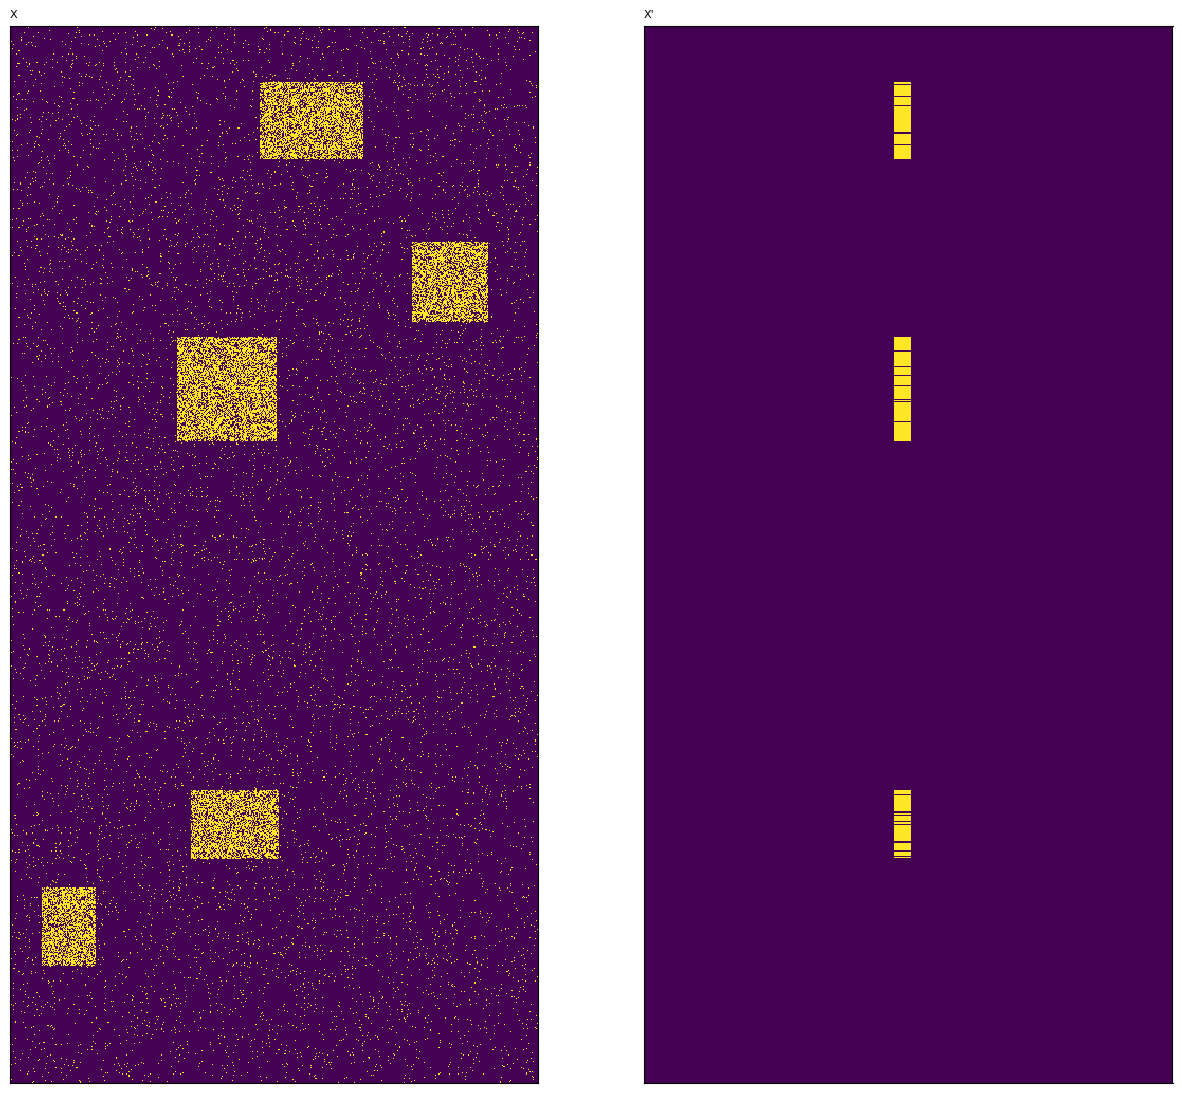

In [40]:
from utils import matmul, to_dense, show_matrix
settings = [(to_dense(X_test), [0, 0], 'X'), 
            (matmul(panda.U, panda.V.T, sparse=False, boolean=True), [0, 1], "X'")]
show_matrix(settings=settings)